# Data understanding and cleaning
**Part I**

The purpose of this data mining project is to classify the probability of the toxicity (edible or poisonous) of fungi specimens based on 22 different physical characteristics. The dataset has over 8124 rows of data with 23 columns, each representing the physical data of a fungi specimen. This is an entirely categorical dataset with a binary class label: poisonous or edible - which poses some difficulties in training a machine learning model. About one quarter of the data has missing values which were estimated using other data (it is not possible to take the mean/median from categorical data) from other rows rather than just simply being removed. 

This section involves EDA, Feature selection, Data cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("data/agaricus-lepiota.data")

# column names provided in dataset information file
columns = ['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
           'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
           'spore-print-colors', 'population', 'habitat']
data.columns = columns

In [3]:
columns.append(columns[0])
columns.pop(0)
data = data[columns]

In [4]:
pd.options.display.max_columns = None
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-colors,population,habitat,edibility
0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
1,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
2,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
3,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e
4,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g,e


In [5]:
print(f'dataframe dimensions: {data.shape}')
print('----------------------------------------------')
print(data.info())
print('----------------------------------------------')
print(data.isna().sum())
print('----------------------------------------------')
print('Checking the variable with missing values as stated in the metadata')
print(data['stalk-root'].value_counts())

dataframe dimensions: (8123, 23)
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8123 non-null   object
 1   cap-surface               8123 non-null   object
 2   cap-color                 8123 non-null   object
 3   bruises                   8123 non-null   object
 4   odor                      8123 non-null   object
 5   gill-attachment           8123 non-null   object
 6   gill-spacing              8123 non-null   object
 7   gill-size                 8123 non-null   object
 8   gill-color                8123 non-null   object
 9   stalk-shape               8123 non-null   object
 10  stalk-root                8123 non-null   object
 11  stalk-surface-above-ring  8123 non-null   object
 12  stalk-surface-below-ring  8123 non-null   object
 13

## Plotting count plots of every variable to understand the distribution of the data

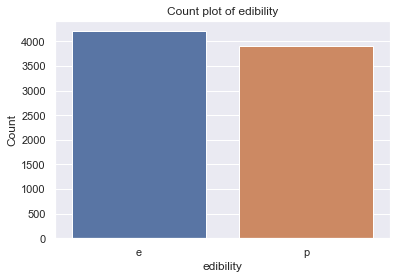

In [6]:
plt.figure()
cp = sns.countplot(x='edibility', data=data)
cp.set_title('Count plot of edibility');
cp.set_ylabel("Count")
plt.show()

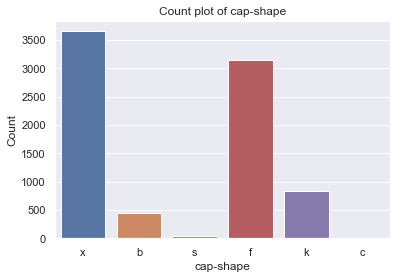

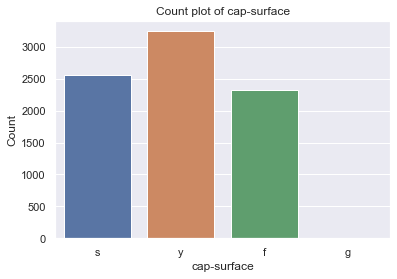

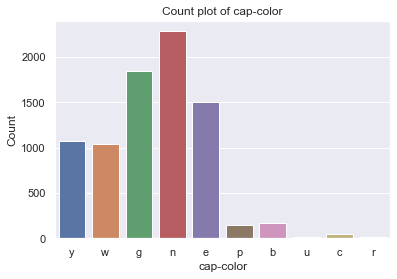

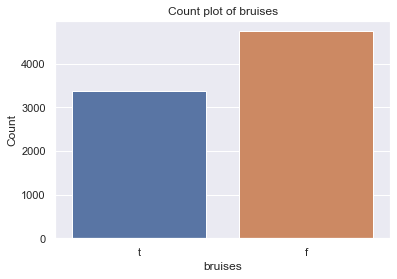

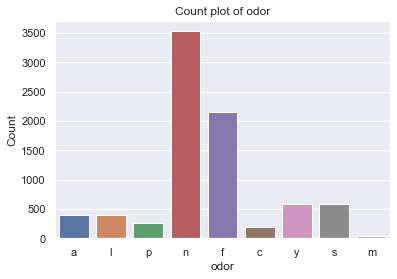

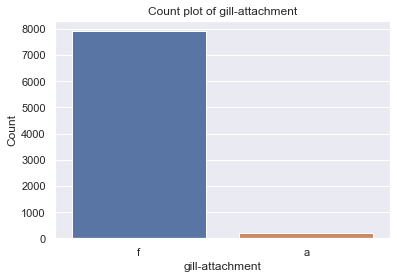

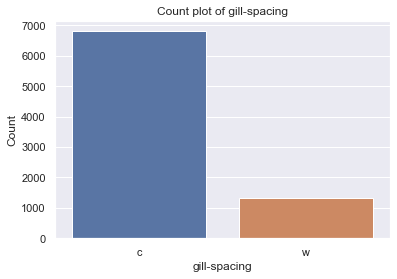

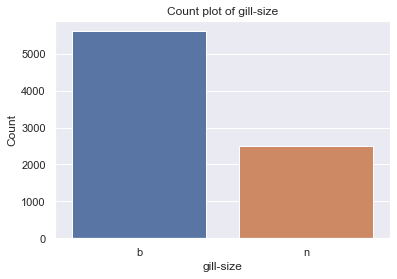

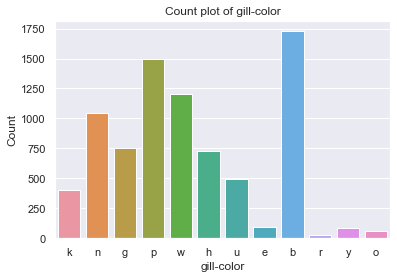

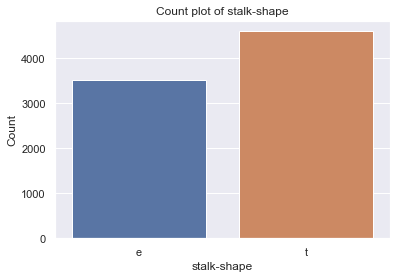

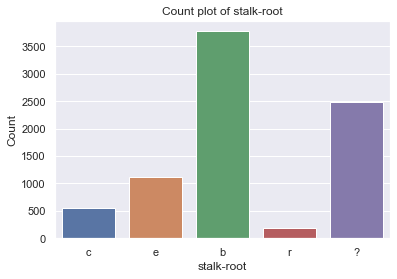

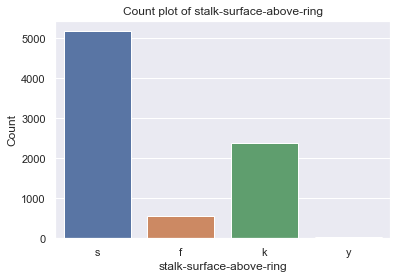

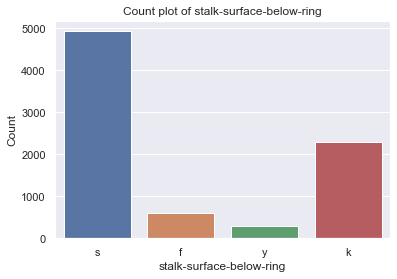

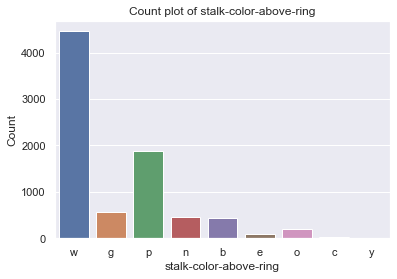

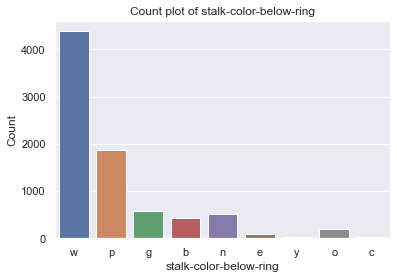

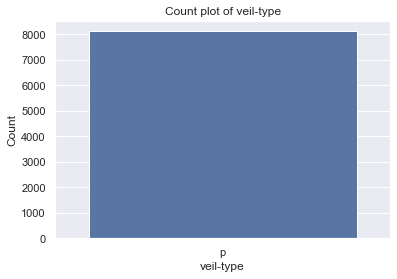

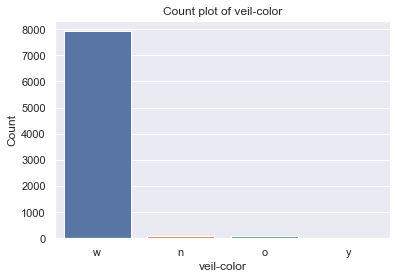

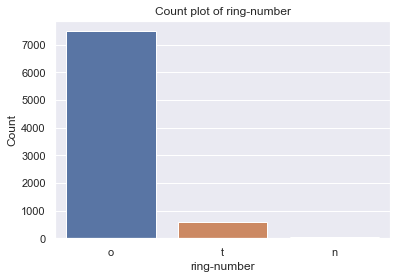

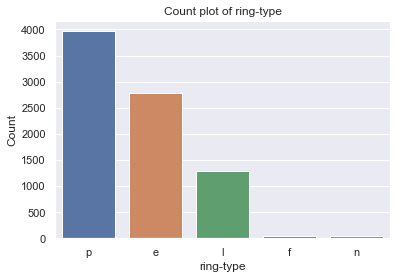

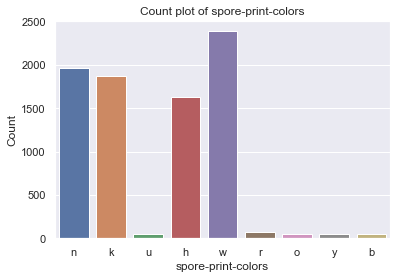

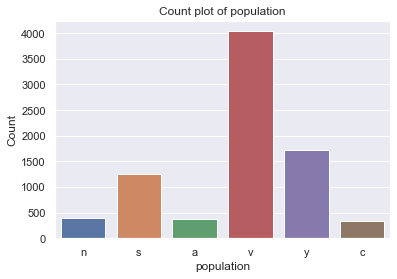

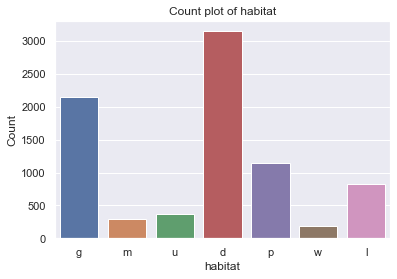

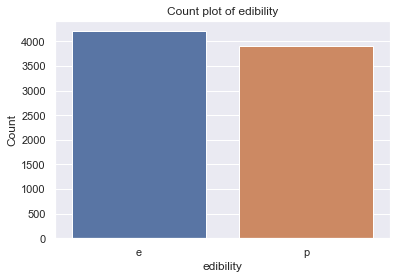

In [7]:
for col in columns:
    plt.figure()
    cp = sns.countplot(x=col, data=data)
    cp.set_title(f'Count plot of {col}');
    cp.set_ylabel("Count")
    plt.show()

## Plotting count plots of predictor variables segregated by class label
The class label is Edible or Poisonous, by plotting the distribution of potential predictor variables divided by their class label I can infer how much each potential predictor variablce consistutes to class label variance. This process of feature selection in the modelling process allows me to eliminate noise features which do not contain any information to the classification of whether a row of data is Poisonous or Edible.

In this visual analysis I will be looking for features with similar distributions of categorical data under the class labels P and E to remove in my classification model

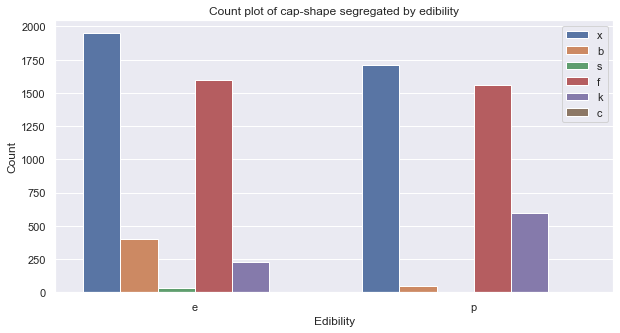

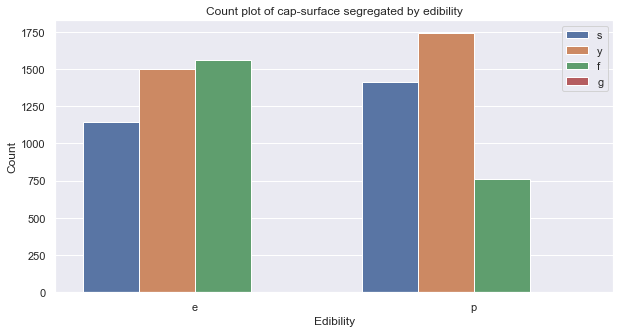

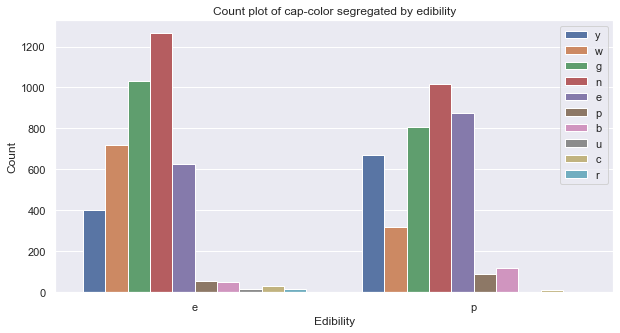

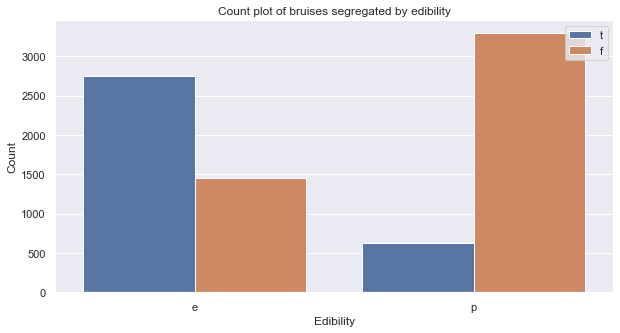

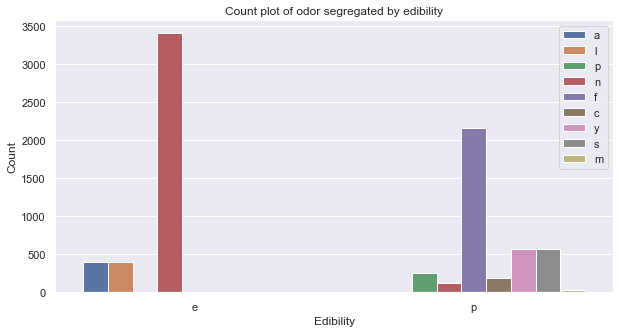

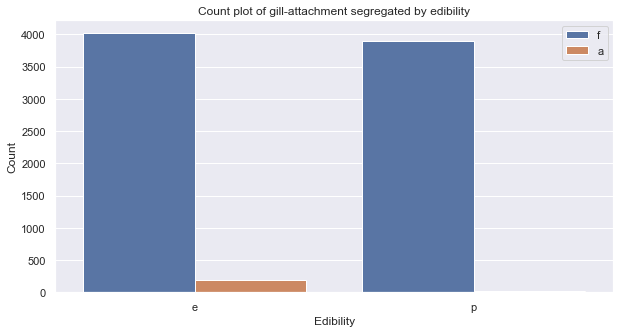

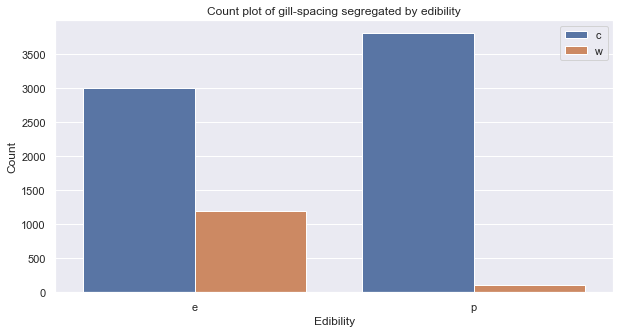

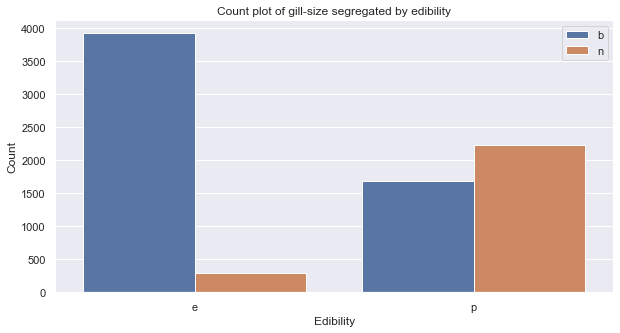

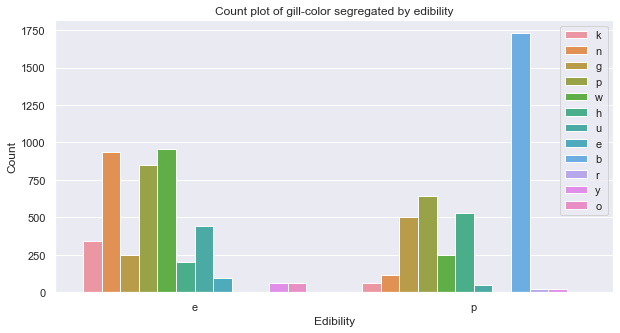

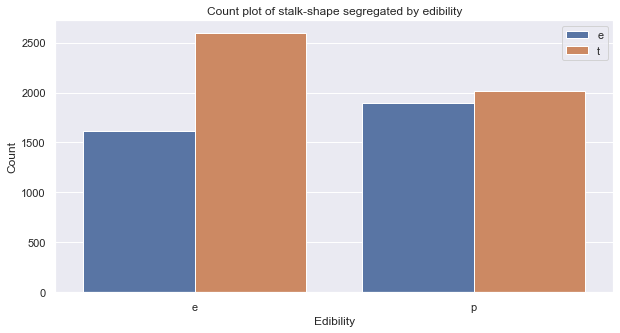

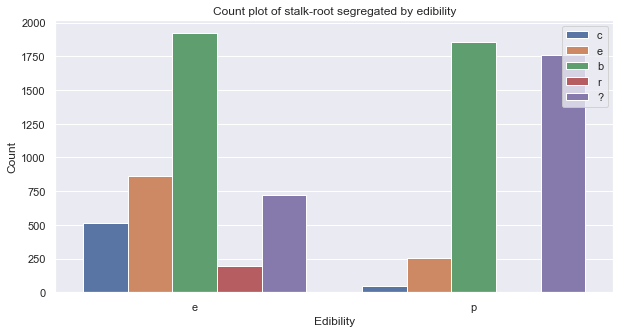

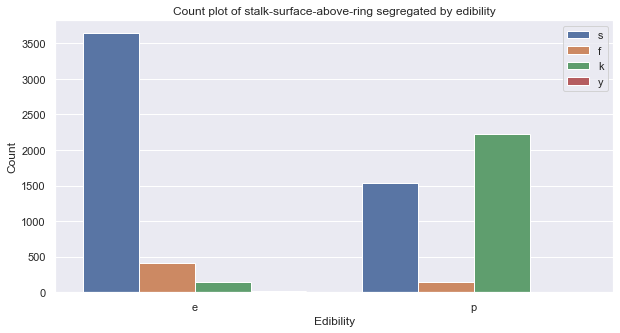

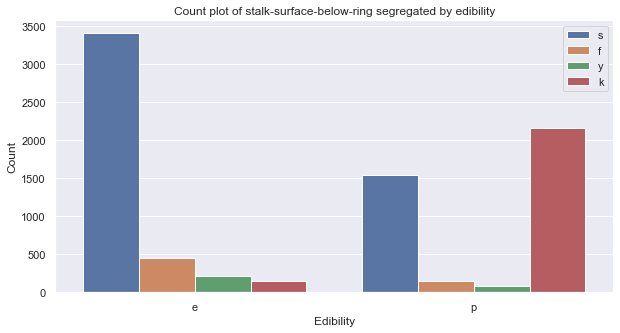

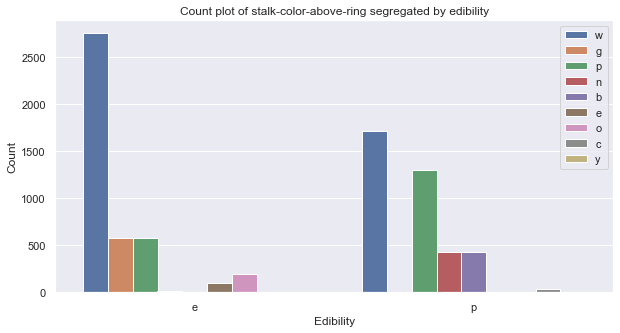

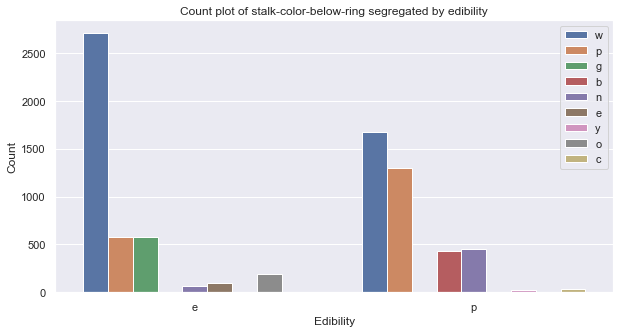

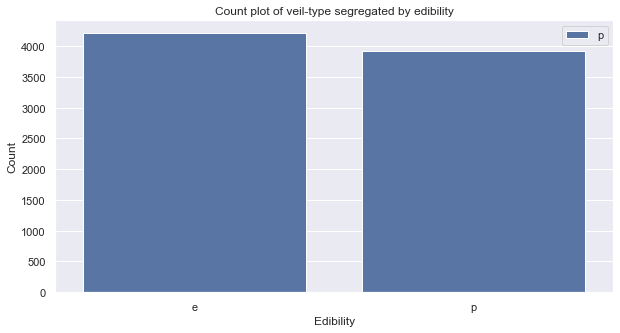

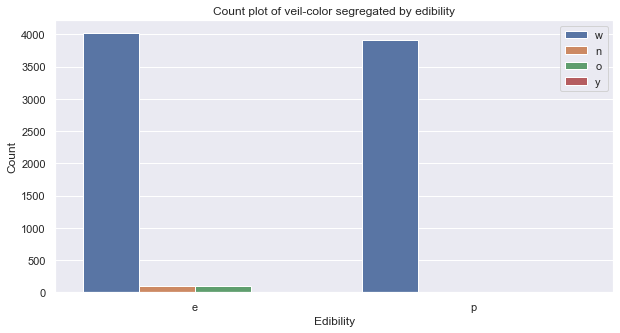

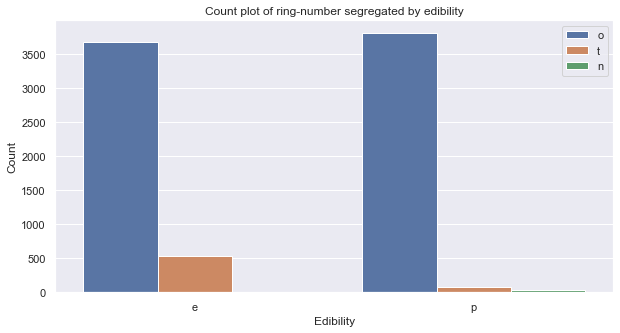

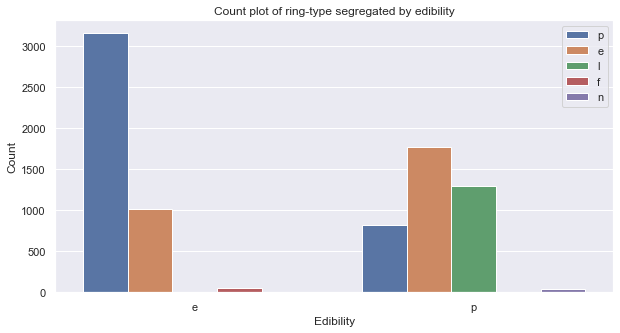

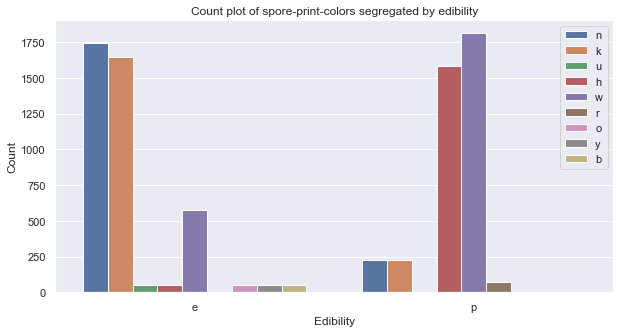

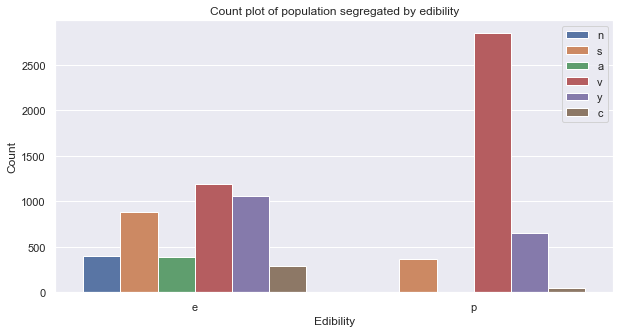

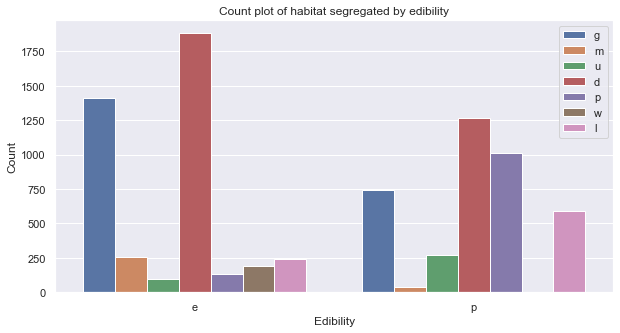

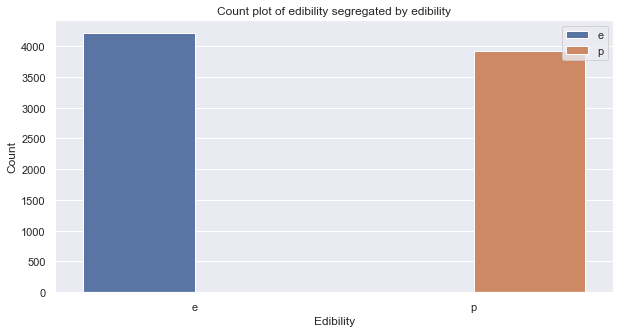

In [8]:
for col in columns:
    plt.figure(figsize=(10, 5))
    cp = sns.countplot(x="edibility", hue=col, data=data)
    cp.set_ylabel("Count")
    cp.set_xlabel("Edibility")
    cp.set_title(f'Count plot of {col} segregated by edibility');
    cp.legend(loc='upper right')
    plt.show()

Columns taken out:
- gill attachment 
- veil type 
- veil colour 
- ring-number

In [9]:
fill_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-spacing', 
           'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type', 
           'spore-print-colors', 'population', 'habitat']

## Data cleaning
* Acquire the index of rows with and without missing data
* Divide the dataset by the missing variablce and all other variables excluding the class variable to prepare for filling in missing values
* Fill in missing values with machine learning and evaluate model before using resuls

In [10]:
data_missing_index = data[data['stalk-root'] == "?"].index
data_filled_index = data[data['stalk-root'] != "?"].index

data_all_y = data['stalk-root']
data_all_x = pd.get_dummies(data[fill_columns].drop('stalk-root',axis=1))

In [11]:
# data to model
data_model_y = data_all_y.iloc[data_filled_index]
data_model_x = data_all_x.iloc[data_filled_index,:]
print(data_model_y.shape, data_model_x.shape)

# data to fill
data_fill_x = data_all_x.iloc[data_missing_index,:]
print(data_fill_x.shape)

(5643,) (5643, 102)
(2480, 102)


I will use a high performing classifier algorithm (random forest) to clean the missing stalk-root data by predicting the values based on other columns of available data. Accuracy will be the metric used for this because it is the standard metric for classification.

Split the data into a stratified training and testing set with 80-20 split to examine the performance of the model to validate it for accuracy 

Test accuracy on the training and testing set, and whether decide to use this model

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data_model_x, data_model_y, test_size=0.2, stratify = data_model_y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4514, 102) (4514,)
(1129, 102) (1129,)


In [14]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
y_ = random_forest.predict(x_train)
acc = accuracy_score(y_train, y_)
print(f'Train data accuracy: {acc}')

y_ = random_forest.predict(x_test)
acc = accuracy_score(y_test, y_)
print(f'Test data accuracy: {acc}')

Train data accuracy: 1.0
Test data accuracy: 1.0


Full accuracy on test dataset

In [16]:
data_fill_y_ = random_forest.predict(data_fill_x)
data_fill_y = pd.Series(data_fill_y_)
data_fill_y.value_counts()

b    2413
e      55
c      12
dtype: int64

In [17]:
data_fill_y.index = data_missing_index

In [18]:
data_cleaned = data.copy()
data_cleaned.iloc[data_missing_index,10] = data_fill_y

In [19]:
data_cleaned.iloc[:,10]

0       c
1       c
2       e
3       e
4       c
       ..
8118    b
8119    b
8120    b
8121    b
8122    b
Name: stalk-root, Length: 8123, dtype: object

In [22]:
data_cleaned['stalk-root'].value_counts()

b    6189
e    1174
c     568
r     192
Name: stalk-root, dtype: int64

In [23]:
data_cleaned.to_csv('data/agaricus-lepiota_cleaned.data', index=False)